In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/My Drive/DriveUploader/online_retail_listing.csv",delimiter=';',encoding="latin-1")

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.00,United Kingdom


In [7]:
df.shape

(1048575, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [9]:
#What is the number of unique products? 
df["Description"].nunique()

5697

In [10]:
#How many of each product? 
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    5875
REGENCY CAKESTAND 3 TIER              4364
JUMBO BAG RED RETROSPOT               3426
ASSORTED COLOUR BIRD ORNAMENT         2928
PARTY BUNTING                         2746
Name: Description, dtype: int64

In [11]:
#What is the most ordered product? 
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,107472
WHITE HANGING HEART T-LIGHT HOLDER,92436
ASSORTED COLOUR BIRD ORNAMENT,80608
JUMBO BAG RED RETROSPOT,77641
BROCADE RING PURSE,70423


In [12]:
df_merge = df['Quantity'].groupby(df['Description']).sum()
print(df_merge)

Description
  DOORMAT UNION JACK GUNS AND ROSES     179
 3 STRIPEY MICE FELTCRAFT               690
 4 PURPLE FLOCK DINNER CANDLES          302
 50'S CHRISTMAS GIFT BAG LARGE         1875
 ANIMAL STICKERS                        385
                                       ... 
wrongly marked carton 22804            -256
wrongly marked. 23343 in box          -3100
wrongly sold (22719) barcode            170
wrongly sold as sets                   -600
wrongly sold sets                      -975
Name: Quantity, Length: 5697, dtype: int64


In [13]:
#How many invoices were issued in total?
df["Invoice"].nunique()

52961

In [14]:
# How much was paid per invoice?
# First we must return Price to float
# .apply()對那一欄操作
df["Price"] = df["Price"].apply(lambda x: float(str(x.replace(',','.'))))
df["TotalPrice"] = df["Quantity"]*df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,1.25,13085.00,United Kingdom,30.00


In [15]:
#axis{0 or ‘index’, 1 or ‘columns’}, default 0
#If 0 or ‘index’: apply function to each column. If 1 or ‘columns’: apply function to each row.
df.groupby("Invoice").agg({"TotalPrice":"sum"}).head()

,TotalPrice
Invoice,
489434,505.30
489435,145.80
489436,630.33
489437,310.75
489438,2286.24


In [16]:
#What are the most expensive products? 
df.groupby("Description").agg({"Price":"max"}).sort_values("Price", ascending = False).head()

,Price
Description,
Manual,38970.00
Bank Charges,18910.69
AMAZON FEE,16888.02
Adjust bad debt,11062.06
POSTAGE,8142.75


In [17]:
#How many orders came from which country?
df["Country"].value_counts().head()

United Kingdom    963819
EIRE               17581
Germany            17327
France             14100
Netherlands         5054
Name: Country, dtype: int64

In [18]:
#What is the most returned product? 
#外面再包一個df，是因為原本裡面的df["Invoice"]是一個series，要把它變成dataframe，才能再做下一步的按照Quantity降冪排列，因為有包含到其他欄了。
#na=false，就是他沒有要把na的值納進來，如果na=true，他就會納入
returned = df[df["Invoice"].str.contains("C",na=False)]
returned.sort_values("Quantity", ascending = True).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18.01.2011 10:17,1.04,12346.00,United Kingdom,-77183.60
529729,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2.12.2010 14:23,0.03,15838.00,United Kingdom,-280.80
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2.12.2010 14:23,0.03,15838.00,United Kingdom,-280.80
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,28.09.2010 11:02,0.08,14277.00,France,-570.24
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,28.09.2010 11:02,0.13,14277.00,France,-911.04


In [19]:
#missing value Analysis
df.isnull().sum()

Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236682
Country             0
TotalPrice          0
dtype: int64

In [20]:
#df.dropna()和df.dropna(inplace=true)的差別在於，前者沒有真的寫入，指令過後df.isnull().sum()還是有空值，但後者則是真的寫入，所以指令過後df.isnull().sum()就沒有空值了，也就是這些數據真的被去除了。
#https://ithelp.ithome.com.tw/articles/10193421 可以參考
df.dropna(inplace=True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [21]:
#outlier value Analysis 異常值分析
#.shape[0]gives number of row count
for feature in ["Quantity","Price","TotalPrice"]:

    Q1 = df[feature].quantile(0.01)
    Q3 = df[feature].quantile(0.99)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Quantity yes
2142
Price yes
1789
TotalPrice yes
2113


In [22]:
#Recency -R 最近一次消費
# ~ 是反選的符號
#.astype(int)將浮點數轉為整數
df = df[~df["Invoice"].str.contains("C", na = False)]
df["Customer ID"] = df["Customer ID"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
#找出最小日期和最大日期
print("Min Date", df["InvoiceDate"].min(), "Max Date", df["InvoiceDate"].max())

Min Date 1.02.2010 08:13 Max Date 9.12.2010 20:01


In [24]:
#這個客戶距離現在設定的時間有多少天
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]) #讓invoiceDate後面變成有:00
recency = (dt.datetime(2012, 1, 1) - df.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})
recency["Recency"] = recency["Recency"].apply(lambda x: x.days)
#recency.columns = ['haha']，這個方法可以改欄位名稱
#https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/ 可以參考這個教學
recency.head()

,Recency
Customer ID,
12346,347
12347,61
12348,97
12349,40
12350,332


In [25]:
#Frequency-F
#這個客人來的頻率，去計算他日期總共有哪些nunique值，代表他多常來
#可以參考https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
freq = df.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})

In [26]:
#Monetary-M
monetary = df.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})
monetary.head(100)

,Monetary
Customer ID,
12346,77556.46
12347,5408.50
12348,2019.40
12349,4428.69
12350,334.40
...,...
12444,5005.46
12445,434.98
12446,1002.31


In [27]:
#concat 設定 axis=0 為直向合併
#concat 設定 axis=0 為橫向合併
rfm = pd.concat([recency, freq, monetary],  axis=1)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,347,12,77556.46
12347,61,7,5408.50
12348,97,5,2019.40
12349,40,4,4428.69
12350,332,1,334.40


In [28]:
#https://zhuanlan.zhihu.com/p/68194655 可以參考
#將每一欄的數據平均分成你要的組數，並且盡量讓每一個組別的個數一樣
#R:最近一次消費，所以數值越大越低分。F:消費頻率，數值越大分數越高。M:消費金額，數值越大分數越高。
rfm["RecencyScore"]  = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346,347,12,77556.46,2,5,5
12347,61,7,5408.50,4,4,5
12348,97,5,2019.40,3,4,4
12349,40,4,4428.69,5,3,5
12350,332,1,334.40,2,1,2


In [29]:
# RFM Scores: Category
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) + 
                    rfm['FrequencyScore'].astype(str) + 
                    rfm['MonetaryScore'].astype(str))
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,347,12,77556.46,2,5,5,255
12347,61,7,5408.50,4,4,5,445
12348,97,5,2019.40,3,4,4,344
12349,40,4,4428.69,5,3,5,535
12350,332,1,334.40,2,1,2,212


In [30]:
#https://www.delftstack.com/zh-tw/api/python-pandas/pandas-dataframe-dataframe.replace-function/
#有使用正規表示式，就要使用regex=True
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,347,12,77556.46,2,5,5,255,Can't Loose
12347,61,7,5408.50,4,4,5,445,Loyal Customers
12348,97,5,2019.40,3,4,4,344,Loyal Customers
12349,40,4,4428.69,5,3,5,535,Potential Loyalists
12350,332,1,334.40,2,1,2,212,Hibernating


In [31]:
#summary statistics
#DataFrame.columns => The column labels of the DataFrame.
rfmStats = rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats.columns = rfmStats.columns.map('_'.join).str.strip('|')
rfmStats

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,151.84,151.00,401,40.88,1.41,1.00,401,0.49,532.87,354.12,401,597.82
At Risk,397.52,400.00,754,110.26,3.80,3.00,754,1.48,1330.13,977.91,754,1736.70
Can't Loose,347.01,348.00,75,92.30,14.61,11.00,75,17.30,7194.45,3729.42,75,13137.98
Champions,32.47,33.00,852,7.25,18.29,11.00,852,27.20,10140.84,3777.14,852,34401.24
Hibernating,497.46,472.00,1511,163.59,1.24,1.00,1511,0.43,426.89,283.60,1511,767.72
Loyal Customers,99.80,86.00,1139,48.06,10.17,8.00,1139,8.76,4574.64,2657.76,1139,9931.60
Need Attention,151.22,146.00,268,40.65,3.09,3.00,268,0.66,1125.34,881.04,268,1352.62
New Customers,35.32,36.00,56,6.47,1.00,1.00,56,0.00,294.74,245.70,56,213.26
Potential Loyalists,52.52,47.00,687,18.90,2.59,3.00,687,0.90,1034.15,684.59,687,2423.34


### K-Means

In [32]:
#列取全部，欄只有取Recency~Monetary
rfm_kmeans = rfm.loc[:,"Recency":"Monetary"]
rfm_kmeans.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,347,12,77556.46
12347,61,7,5408.50
12348,97,5,2019.40
12349,40,4,4428.69
12350,332,1,334.40


In [33]:
##########################################
###     CLUSTRING WITH THE K-MEANS     ###
##########################################
#參考資料https://ithelp.ithome.com.tw/articles/10240494
#參考資料https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler
#scaled = MinMaxScaler((0,1)) feature_rangetuple (min, max), default=(0, 1) Desired range of transformed data.
scaled = MinMaxScaler()
dataframe = scaled.fit_transform(rfm_kmeans)#dataframe型態變成numpy.ndarray型態，但還是二維陣列
print('資料集rfm_kmeans的平均值'+'\n',rfm_kmeans.mean(axis=0))
print('資料集rfm_kmeans的標準差'+'\n',rfm_kmeans.std(axis=0))
kmeans = KMeans(n_clusters = 10)#分成10組
k_fit = kmeans.fit(dataframe)
k_fit.labels_ #每個點的分類

資料集rfm_kmeans的平均值
 Recency      233.09
Frequency      6.20
Monetary    2954.96
dtype: float64
資料集rfm_kmeans的標準差
 Recency       213.81
Frequency      12.78
Monetary    14348.87
dtype: float64


array([7, 2, 9, ..., 3, 8, 2], dtype=int32)

Text(0.5, 1.0, 'Elbow method for Optimum number of clusters')

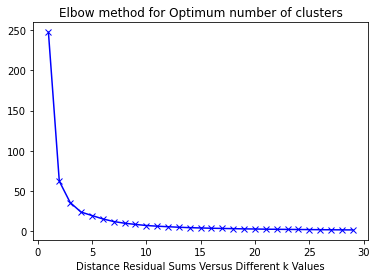

In [34]:
#n_cluster:K的大小，也就是分群的類別數量
#inertia_:每個點到其他叢集的質心的距離之和
#bx- => b:藍色 x:x marker -:solid line 實線
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(dataframe)
    ssd.append(kmeans.inertia_)
#ssd
plt.plot(K, ssd, "bx-")
plt.xlabel("Distance Residual Sums Versus Different k Values")
plt.title("Elbow method for Optimum number of clusters")

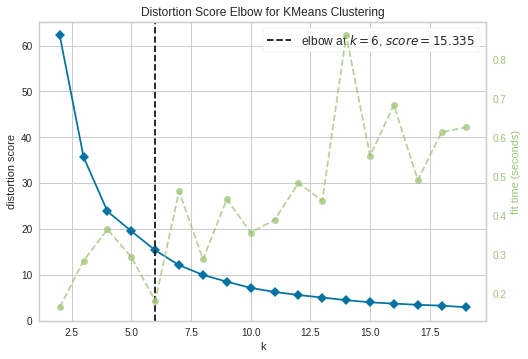

In [35]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visu = KElbowVisualizer(model, k = (2,20)) #用KMeans()這個model,k的範圍值從2-19
visu.fit(dataframe) # Fit the data to the visualizer
visu.poof() # Draw/show/poof the data

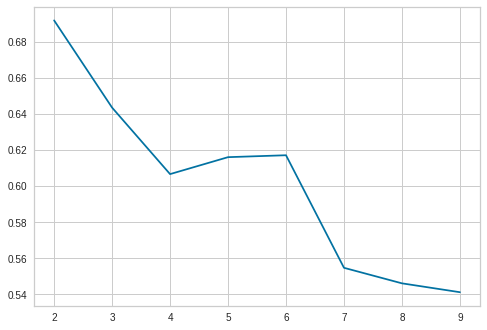

In [36]:
#可參考網址 https://jimmy-huang.medium.com/kmeans%E5%88%86%E7%BE%A4%E6%BC%94%E7%AE%97%E6%B3%95-%E8%88%87-silhouette-%E8%BC%AA%E5%BB%93%E5%88%86%E6%9E%90-8be17e634589
#輪廓係數 Silhouette Coefficient
#為什麼我們選擇k=6當作我們的分群 參考網址：https://cxyzjd.com/article/AugustMe/101979070
from sklearn.metrics import silhouette_score
silhouette_avg = []
for i in range(2,10):
    kmeans_fit = KMeans(n_clusters = i).fit(dataframe)
    silhouette_avg.append(silhouette_score(dataframe, kmeans_fit.labels_))
plt.plot(range(2,10), silhouette_avg)

In [37]:
kmeans = KMeans(n_clusters = 6).fit(dataframe)
cluster = kmeans.labels_ #cluster是一維陣列，一個list的意思
#pd.DataFrame({"Customer ID": rfm.index, "Cluster": cluster})
rfm_kmeans["cluster_no"] = cluster +1
# rfm_kmeans["cluster_no"] = rfm_kmeans["cluster_no"] + 1
rfm_kmeans.head()

,Recency,Frequency,Monetary,cluster_no
Customer ID,,,,
12346,347,12,77556.46,1
12347,61,7,5408.50,2
12348,97,5,2019.40,2
12349,40,4,4428.69,2
12350,332,1,334.40,1


In [38]:
import plotly.express as px
fig = px.scatter_3d(rfm_kmeans, x=rfm_kmeans["Recency"], y=rfm_kmeans["Frequency"], z=rfm_kmeans["Monetary"], color=rfm_kmeans["cluster_no"])
fig.show()